# Tarea 4 Clasificación de Tweets en Español (Análisis de Sentimientos)

* Este notebook tiene como objetivo aplicar los conocimientos vistos hasta el momento de:
    - Normalización de textos (procesamiento de textos)
    - Clasificación de textos
    
    
* El ejercicio consiste en clasificar una serie de tweets en Español que estan clasificados como '***positivos***', '***neutros***', '***negativos***' o '***None***' (desconocido), aunque solo vamos a trabajar con los tweets clasificados correctamente (los no desconocidos).


* Para este ejercicio se pide realizar todo el proceso de clasificación visto hasta el momento:
    1. Carga de los datos (ya implementado en el ejercicio)
    2. Normalización de los tweets
    3. Creacción de la Bolsa de Palabras
    4. Particionado de Datos
    5. Creacción de modelos
    6. Evaluación de los modelos


* Los puntos del 2 al 6 son los que hay que realizar con los visto hasta el momento.

<hr>


## Carga de Datos


* El primer paso que vamos a realizar es el de cargar los datos. 


* Estos datos estan en un archivo con extensión '*txt*' pero tienen estructura de '*csv*' y tienen como separador '***::::***'.


* Este fichero lo podemos leer como un '*csv*' con pandas, estructurándolo de la siguiente manera:
    - **Posición 0**: Tweet
    - **Posición 1**: Sentimiento (Positivo | Neutro | Negativo)
    
    
* Los tweets estan clasificados con 4 etiquetas, pero vamos a trabajar solo con los tweets que sean '***positivos***', '***neutros***' o '***negativos***'.

In [ ]:
import pandas as pd

tweets_file = '/tweets_castellano.txt' #'./data/tweets_castellano.txt'
df = pd.read_csv(tweets_file, sep="::::", names=['tweet','sentimiento'] ,engine='python')
df = df[df['sentimiento'].isin(['positivo', 'neutro', 'negativo'])]
tweets = [tuple(x) for x in df.values]
print('Número de Tweets Cargados: {num}'.format(num=len(tweets)))
df.head(5)

Número de Tweets Cargados: 5735


,tweet,sentimiento
1,@PauladeLasHeras No te libraras de ayudar me/n...,neutro
2,@marodriguezb Gracias MAR,positivo
3,"Off pensando en el regalito Sinde, la que se v...",negativo
4,Conozco a alguien q es adicto al drama! Ja ja ...,positivo
6,Toca @crackoviadeTV3 . Grabación dl especial N...,positivo


In [ ]:
print(len(tweets))
tweets[0]

5735


('@PauladeLasHeras No te libraras de ayudar me/nos. Besos y gracias', 'neutro')

<hr>


## Normalización



In [ ]:
!pip install spacy

In [ ]:
# Español
!python -m spacy download es_core_news_sm 

     |████████████████████████████████| 16.2 MB 1.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
import spacy
from spacy.lang.es.examples import sentences 

from tqdm import tqdm
nlp = spacy.load("es_core_news_sm")


In [ ]:
# Divido los datos en dos listas 
#     X: los tweets
#     y: target (polaridad)

X = [doc[0] for doc in tweets]
y = [doc[1] for doc in tweets]

def normalize(sentenses):
    """normalizamos la lista de frases y devolvemos la misma lista de frases normalizada"""
    for index, sentense in enumerate(tqdm(sentenses)):
        sentense = nlp(sentense.lower()) # Paso la frase a minúsculas y a un objeto de la clase Doc de Spacy
        sentenses[index] = " ".join([word.lemma_ for word in sentense if (not word.is_punct)
                                     and (len(word.text) > 2) and (not word.is_stop) 
                                     and (not word.text.startswith('@')) and (not word.text.startswith('http'))])
    return sentenses

# Normalizamos las frases
X = normalize(X)

100%|██████████| 5735/5735 [01:13<00:00, 78.47it/s]


In [ ]:
X

['librar ayudar beso gracia',
 'gracia mar',
 'off pensar regalito sinde sgae corrupto sacar conclusión',
 'conocer alguien adicto drama sonar',
 'tocar grabación especial navideño mari crisma',
 'mandar abrazar grande miguel familia grandeza humano',
 'escaño listar empezar endiascomohoy congreso',
 'bdías ira puente dejeis tableta orbyt decir',
 'sistema económico recortar dinero prestación social reforzar billón euro banco necesitar repensarse',
 'programascambiados caca ajustar',
 'viernes',
 'programascambiados gracia gracia rato amigo',
 'universidad confiar callar encarar reto ambicioso',
 'ayudar indultoneiro zapatero sugerencia consejo ministro',
 'abcdesevilla.es recio indicio potente denunciar responsable erar',
 'abcdesevilla.es alto cargo denunciar retirar prejubilación extrabajadores',
 'marchar atrás posponer devolución ccaa resbalón deber asumir fallir mentir decir conocer cuenta',
 'viernes negro aumentar parir noviembre disminuir afiliar seguridad social triste herenc

<hr>


## Bolsa de Palabras



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000, min_df=3)

# Pasamos los tweets normalizados a Bolsa de palabras
X = vectorizer.fit_transform(X)

<hr>


## Particionado de Datos (Train y Test)

* Particionar los datos en conjunto de Train y Test de la siguiente manera:
    - 80% de datos de entrenamiento
    - 20% de datos de test


In [ ]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Número de Tweets para el entrenamiento: {num}'.format(num=X_train.shape[0]))
print('Número de Tweets para el test: {num}'.format(num=X_test.shape[0]))

Número de Tweets para el entrenamiento: 4588
Número de Tweets para el test: 1147


<hr>


## Creacción del Modelo


In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

mnb = MultinomialNB()
bnb = BernoulliNB()
rf_100_5 = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_100_2 = GradientBoostingClassifier(n_estimators=100,max_depth=2, random_state=0)
rf_500_5 = GradientBoostingClassifier(n_estimators=500,  max_depth=5, random_state=0)
rf_500_2 = GradientBoostingClassifier(n_estimators=500, max_depth=2, random_state=0)


clasificadores = {'Multinomial NB': mnb,
                  'Bernoulli NB': bnb,
                  'Random Forest d_100a': rf_100_5,
                  'Random Forest d_100b': rf_100_2,
                  'Random Forest d_500a': rf_500_5,
                  'Random Forest d_500b': rf_500_2}


# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)

CREANDO MODELO: Multinomial NB
CREANDO MODELO: Bernoulli NB
CREANDO MODELO: Random Forest d_100a
CREANDO MODELO: Random Forest d_100b
CREANDO MODELO: Random Forest d_500a
CREANDO MODELO: Random Forest d_500b


<hr>


## Evaluación del Modelo



In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de 
    Accuracy, Precision, Recall y F1 para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train: Variables de entrada del conjunto de datos de entrenamiento
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test: Variables de entrada del conjunto de datos de test
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    
    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_train, y_train=y_train,
                                 X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Multinomial NB,0.738666,0.678291,0.730877,0.650313,0.738666,0.678291,0.725792,0.658242
Bernoulli NB,0.738230,0.673932,0.730059,0.643108,0.738230,0.673932,0.724644,0.650148
Random Forest d_100a,0.750218,0.622493,0.794737,0.594820,0.750218,0.622493,0.725136,0.576980
Random Forest d_100b,0.636007,0.582389,0.695449,0.583947,0.636007,0.582389,0.580780,0.519285
Random Forest d_500a,0.898649,0.661726,0.907191,0.627829,0.898649,0.661726,0.895768,0.630237
Random Forest d_500b,0.749564,0.642546,0.779318,0.603271,0.749564,0.642546,0.725463,0.602915


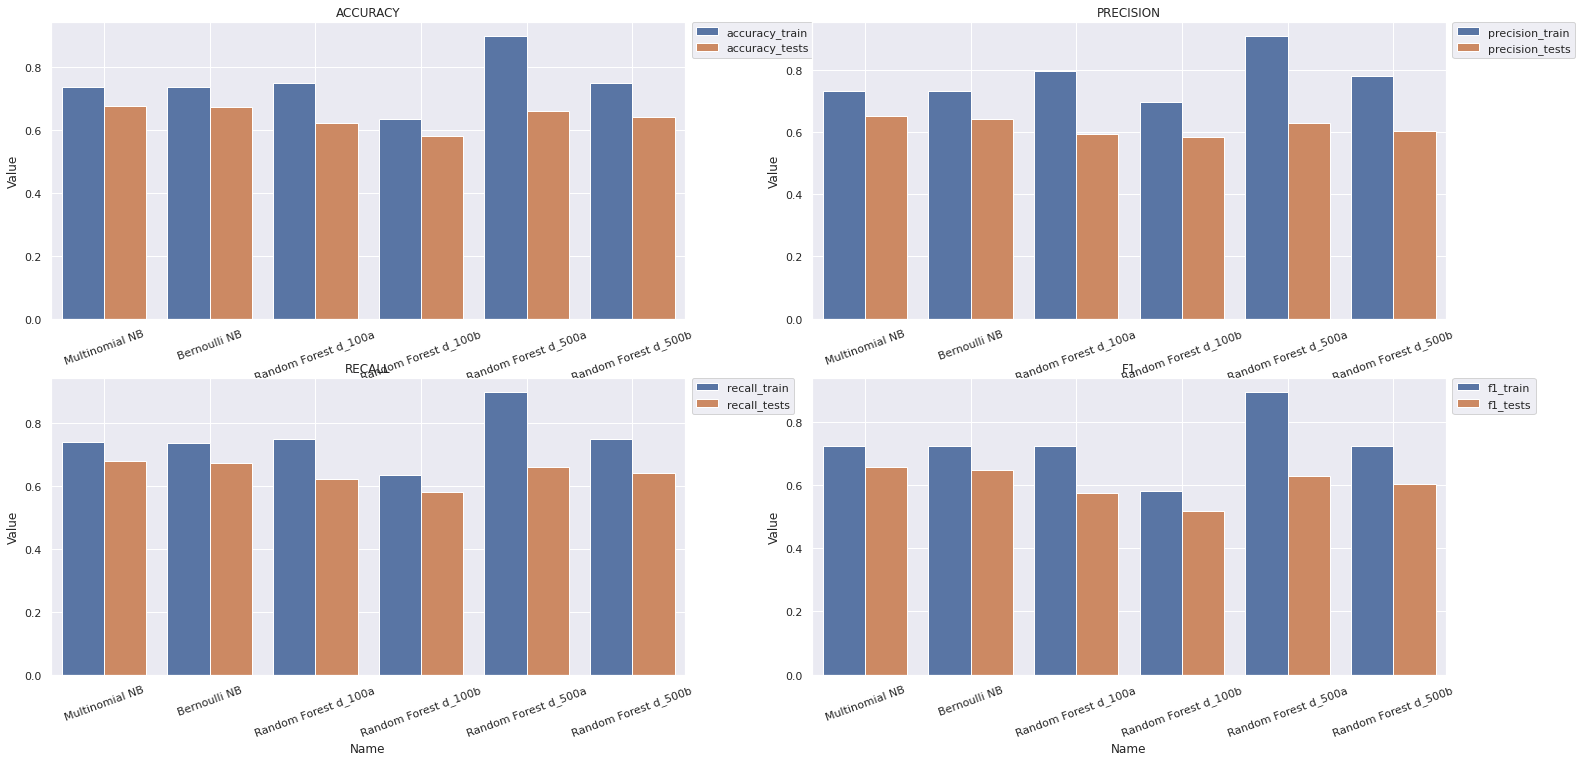

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark")
%matplotlib inline

# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = df.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(25, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]
    
    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

Obteniendo Matriz de Confusión de: Multinomial NB
Obteniendo Matriz de Confusión de: Bernoulli NB
Obteniendo Matriz de Confusión de: Random Forest d_100a
Obteniendo Matriz de Confusión de: Random Forest d_100b
Obteniendo Matriz de Confusión de: Random Forest d_500a
Obteniendo Matriz de Confusión de: Random Forest d_500b


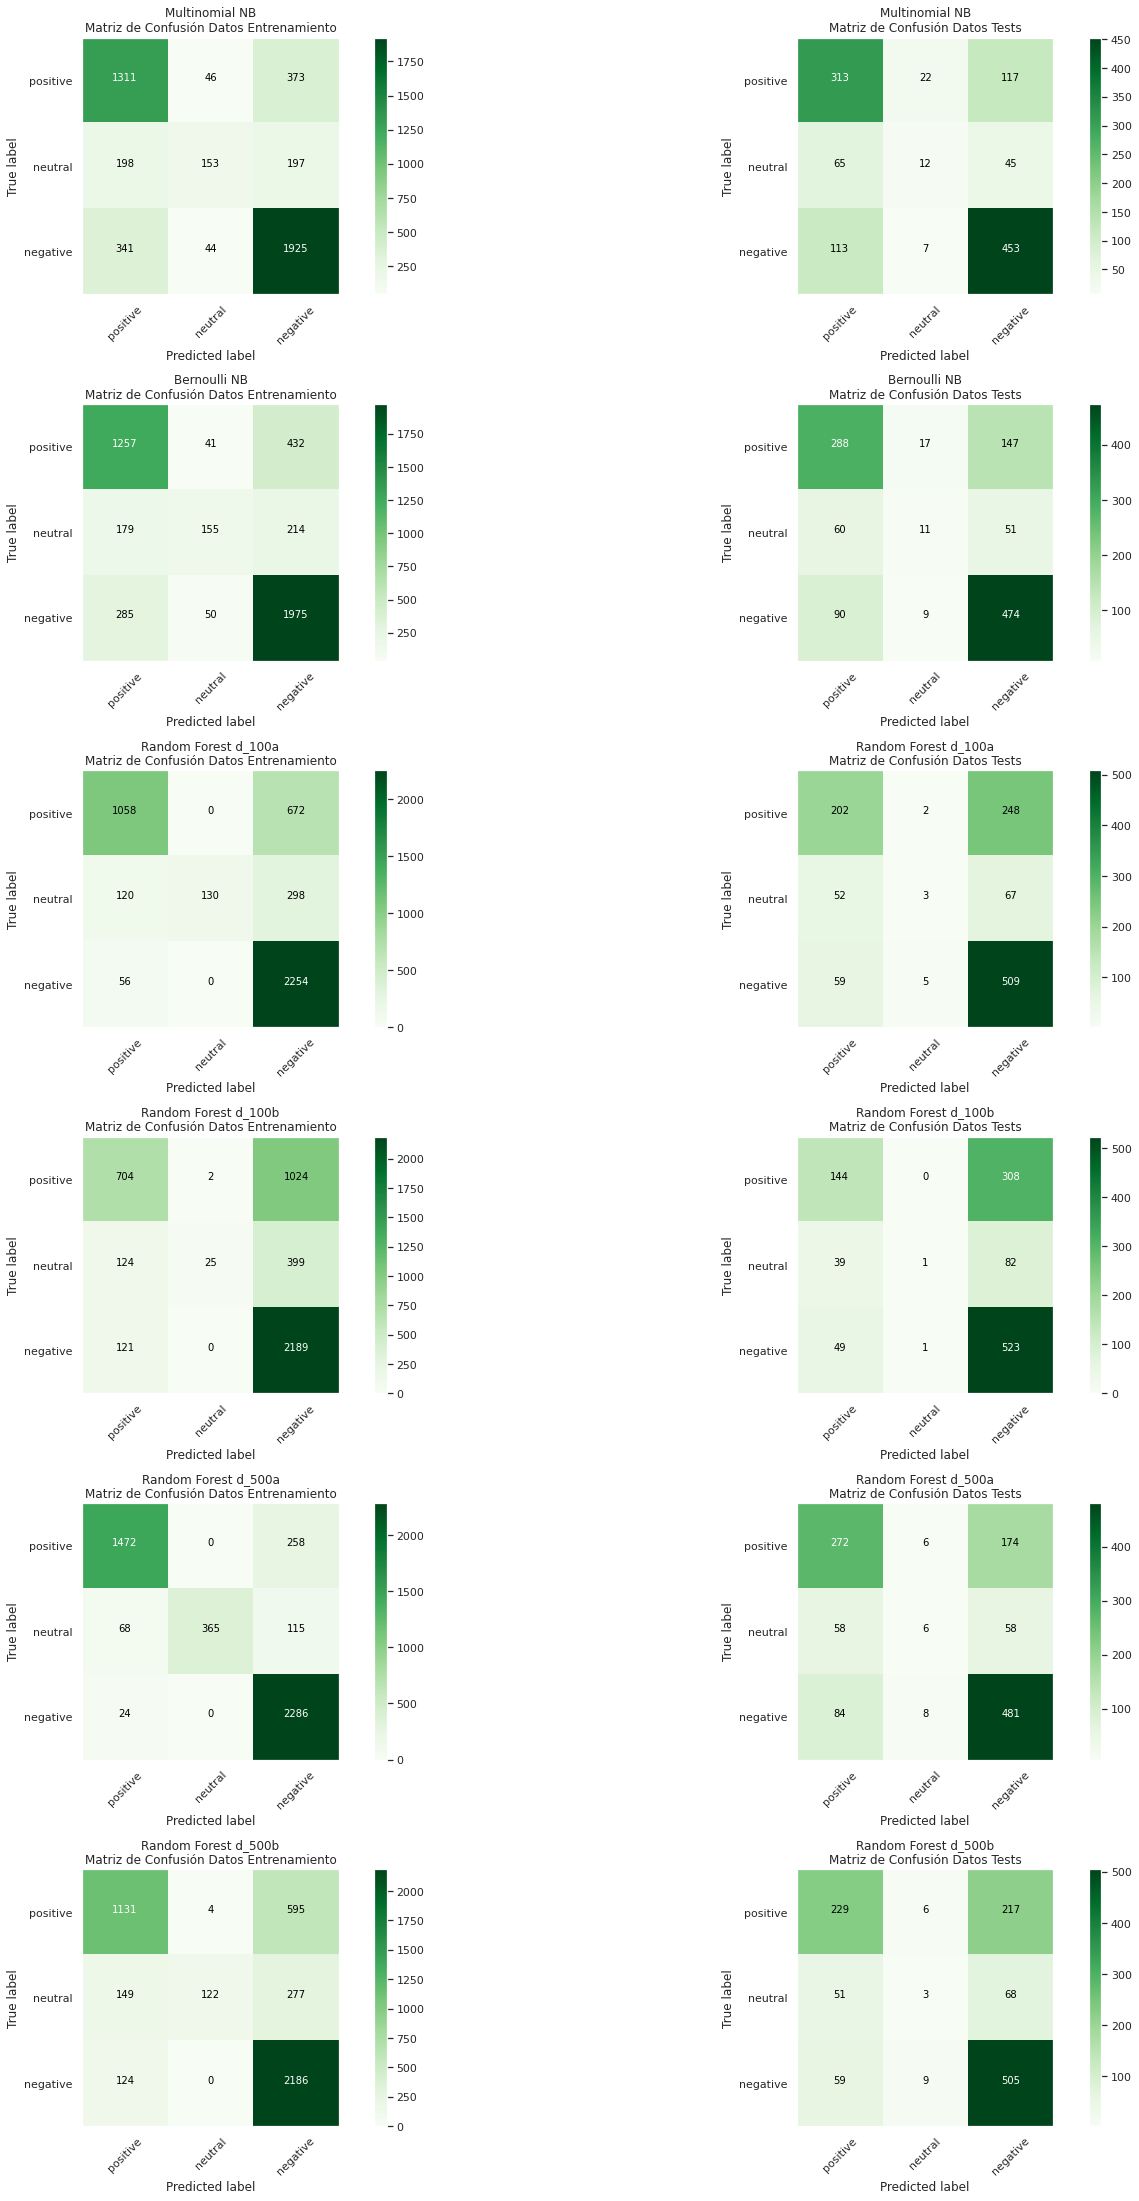

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.metrics import confusion_matrix

# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    msc.append(model)

    
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(20, 45))
pos = 0
for mc in msc:
    pos += 1
    plt.subplot(9, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['positive', 'neutral', 'negative'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    pos += 1
    plt.subplot(9, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['positive', 'neutral', 'negative'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()